In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import os
import random

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set random seed
random.seed(42)

# Set max pixels
# Image.MAX_IMAGE_PIXELS = 933120000
Image.MAX_IMAGE_PIXELS = 1500000000

In [3]:
# Seaborn style
sns.set()
sns.set_theme(style="darkgrid")
coolwarm = sns.color_palette("coolwarm")
pastel = sns.color_palette("pastel")

# Exploratory Data Analysis

In [4]:
BASE_PATH = '/kaggle/input/UBC-OCEAN'
TRAIN_IMG_PATH = BASE_PATH + "/train_images"
TRAIN_THUMB_PATH = BASE_PATH + "/train_thumbnails"
TRAIN_ANN_PATH = BASE_PATH + "/train.csv"
TEST_IMG_PATH = BASE_PATH + "/test_thumbnails"
TEST_ANN_PATH = BASE_PATH + "/test.csv"

In [5]:
print(f"Train images length: {len(os.listdir(TRAIN_IMG_PATH))}")
print(f"Train thumbnails length: {len(os.listdir(TRAIN_THUMB_PATH))}")
print(f"Train annotations length: {len(pd.read_csv(TRAIN_ANN_PATH))}")

Train images length: 538
Train thumbnails length: 513
Train annotations length: 538


In [6]:
# Train annotations overview
train_df = pd.read_csv(TRAIN_ANN_PATH)
train_df.head(8)

,image_id,label,image_width,image_height,is_tma
0,4,HGSC,23785,20008,False
1,66,LGSC,48871,48195,False
2,91,HGSC,3388,3388,True
3,281,LGSC,42309,15545,False
4,286,EC,37204,30020,False
5,431,HGSC,39991,40943,False
6,706,HGSC,75606,25965,False
7,970,HGSC,32131,18935,False


In [7]:
train_df[(train_df['image_id']==13568)]

,image_id,label,image_width,image_height,is_tma
112,13568,LGSC,2964,2964,True


## Visualizing some images

In [8]:
# Create a dictionary with random samples
random_samples = {}

# List of unique labels in the DataFrame
unique_labels = train_df['label'].unique()

# Randomly select one image for each label where is_tma=True
# and one image where is_tma=False
for label in unique_labels:
    is_tma_true_sample = train_df[(train_df['label'] == label) & (train_df['is_tma'] == True)]
    is_tma_false_sample = train_df[(train_df['label'] == label) & (train_df['is_tma'] == False)]
    
    random_sample = random.choice(is_tma_true_sample['image_id'].tolist())
    random_samples[random_sample] = {'label': label, 'is_tma': True}
    
    random_sample = random.choice(is_tma_false_sample['image_id'].tolist())
    random_samples[random_sample] = {'label': label, 'is_tma': False}

# Display the resulting dictionary
print(random_samples)

{91: {'label': 'HGSC', 'is_tma': True}, 1101: {'label': 'HGSC', 'is_tma': False}, 36583: {'label': 'LGSC', 'is_tma': True}, 21260: {'label': 'LGSC', 'is_tma': False}, 41368: {'label': 'EC', 'is_tma': True}, 10800: {'label': 'EC', 'is_tma': False}, 36302: {'label': 'CC', 'is_tma': True}, 60685: {'label': 'CC', 'is_tma': False}, 36783: {'label': 'MC', 'is_tma': True}, 6582: {'label': 'MC', 'is_tma': False}}


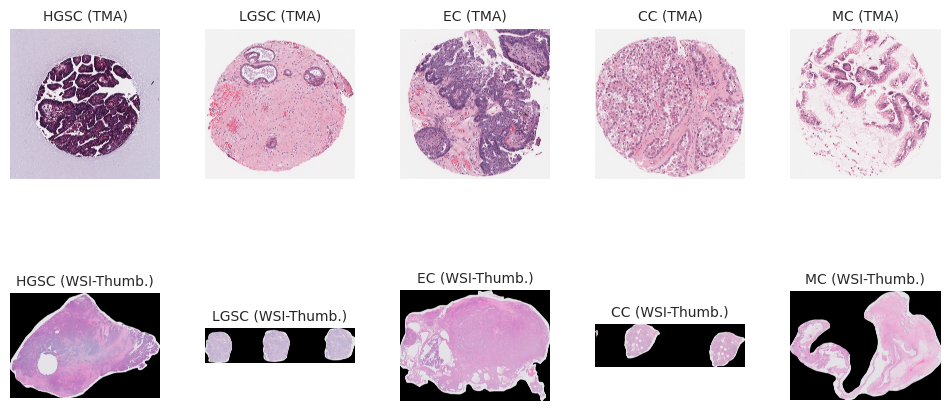

In [9]:
# Define the labels
labels = train_df["label"].unique()

# Create a figure with two rows and five columns
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Iterate through the labels and populate the figure
for col, label in enumerate(labels):
    # Find the corresponding image with is_tma=True
    tma_true_image_id = [k for k, v in random_samples.items() if v['label'] == label and v['is_tma'] is True][0]
    tma_true_image_path = f"{TRAIN_IMG_PATH}/{tma_true_image_id}.png"
    
    # Find the corresponding image with is_tma=False THUMB
    tma_false_image_id = [k for k, v in random_samples.items() if v['label'] == label and v['is_tma'] is False][0]
    tma_false_image_path = f"{TRAIN_THUMB_PATH}/{tma_false_image_id}_thumbnail.png"
    
    # Load and display the images
    tma_true_image = Image.open(tma_true_image_path)
    tma_false_image = Image.open(tma_false_image_path)
    
    axes[0, col].imshow(tma_true_image)
    axes[0, col].set_title(f"{label} (TMA)", fontsize=10)
    axes[0, col].axis('off')

    axes[1, col].imshow(tma_false_image)
    axes[1, col].set_title(f"{label} (WSI-Thumb.)", fontsize=10)
    axes[1, col].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.1)

# Show the figure
plt.show()

### Visualizing non thumbnail images

In [10]:
WSI_ids = []
WSI_paths = []

# Non thumbnail WSI image
for label in labels:
    WSI_id = [k for k, v in random_samples.items() if v['label'] == label and v['is_tma'] is False][0]
    WSI_ids.append(WSI_id)
    WSI_path = f"{TRAIN_IMG_PATH}/{tma_false_image_id}.png"
    WSI_paths.append(WSI_path)
    
print(WSI_ids)
print(WSI_paths)

[1101, 21260, 10800, 60685, 6582]
['/kaggle/input/UBC-OCEAN/train_images/6582.png', '/kaggle/input/UBC-OCEAN/train_images/6582.png', '/kaggle/input/UBC-OCEAN/train_images/6582.png', '/kaggle/input/UBC-OCEAN/train_images/6582.png', '/kaggle/input/UBC-OCEAN/train_images/6582.png']


In [11]:
img_MC = Image.open(WSI_paths[0])

In [12]:
# Get the size of the image and aspect ratio
new_width = 2048
width, height = img_MC.size
aspect_ratio = width / height
new_height = int(new_width / aspect_ratio)

# Print the image size
print(f"Image Width: {width} pixels")
print(f"Image Height: {height} pixels")

Image Width: 40304 pixels
Image Height: 29208 pixels


In [13]:
img_MC_res = img_MC.resize((new_width, new_height))

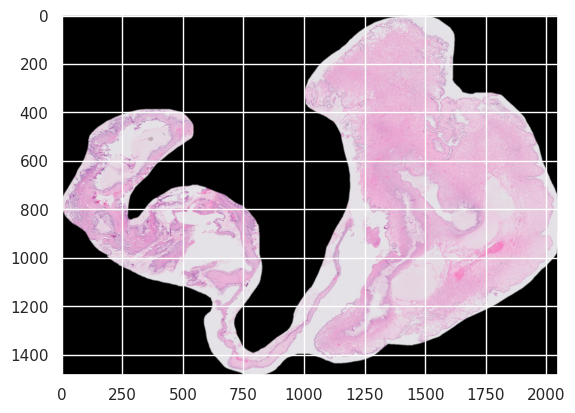

In [14]:
plt.imshow(img_MC_res)

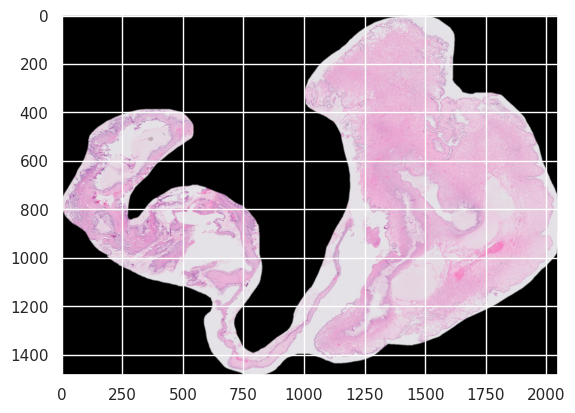

In [15]:
plt.imshow(img_MC_res)

## Cancer subtypes distribution in dataset

**Epithelial ovarian cancer subtypes:**

* **CC** : Clear-cell ovarian Carcinoma
* **EC** : Endometrioid Carcinoma
* **HGSC** : High-Grade Serous Carcinoma
* **LGSC** : Low-Grade Serous Carcinoma
* **MC** : Mucinous Carcinoma
* **Other**: Anything rather than classes mentioned above


<Axes: title={'center': 'Cancer subtypes counts'}, xlabel='label'>

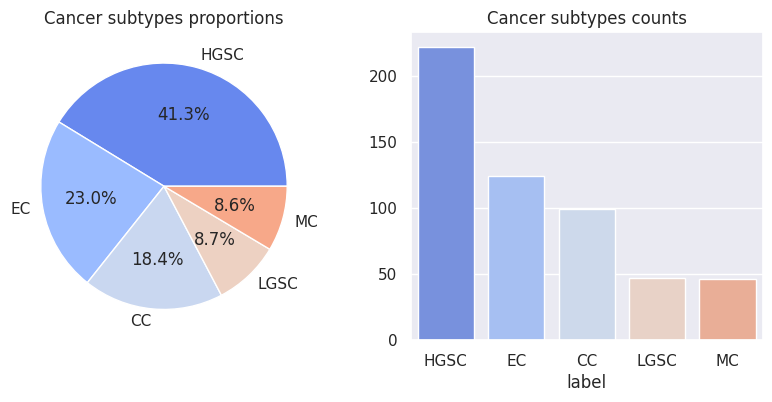

In [16]:
# Label (cancer subtypes) proportions and counts

# Proportions
label_proportions = train_df['label'].value_counts(normalize=True)

label_counts = train_df['label'].value_counts()

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].set_title('Cancer subtypes proportions')
ax[0].pie(label_proportions, labels=label_proportions.index,  autopct='%1.1f%%', colors=coolwarm)
ax[1].set_title('Cancer subtypes counts')
sns.barplot(ax=ax[1],x=label_counts.index, y=label_counts.values, palette=coolwarm)

## WSLI vs TMA distribution in dataset

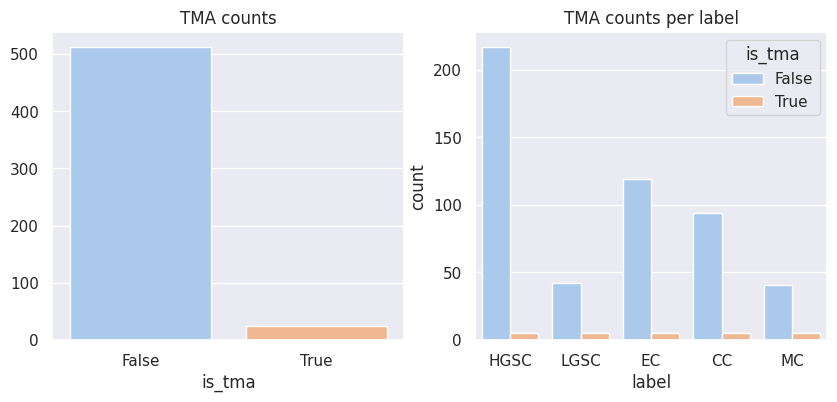

In [17]:
# TMA vs WSI
tma_counts = train_df['is_tma'].value_counts()

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].set_title('TMA counts')
sns.barplot(ax=ax[0], x=tma_counts.index, y=tma_counts.values, palette=pastel)
ax[1].set_title('TMA counts per label')
sns.countplot(ax=ax[1], data=train_df, x='label', hue='is_tma', palette=pastel)
plt.show()

## WSLI vs TMA img sizes

In [18]:
train_df['image_area'] = train_df['image_width'] * train_df['image_height']
train_df.head()

,image_id,label,image_width,image_height,is_tma,image_area
0,4,HGSC,23785,20008,False,475890280
1,66,LGSC,48871,48195,False,2355337845
2,91,HGSC,3388,3388,True,11478544
3,281,LGSC,42309,15545,False,657693405
4,286,EC,37204,30020,False,1116864080


In [19]:
# Image height and width analysis of all images
train_df[['image_height', 'image_width']].describe()

,image_height,image_width
count,538.000000,538.000000
mean,29729.460967,48859.533457
std,10762.899796,20040.989927
min,2964.000000,2964.000000
25%,22089.500000,34509.000000
50%,29732.000000,48160.000000
75%,37880.750000,64143.750000
max,50155.000000,105763.000000


In [20]:
# Image height and width analysis of TMA images
data_TMA = train_df[(train_df['is_tma'])==True]
data_TMA[['image_height', 'image_width']].describe()

,image_height,image_width
count,25.000000,25.000000
mean,3201.440000,3201.440000
std,214.808069,214.808069
min,2964.000000,2964.000000
25%,2964.000000,2964.000000
50%,3388.000000,3388.000000
75%,3388.000000,3388.000000
max,3388.000000,3388.000000


In [21]:
# Image height and width analysis of WSLI images
data_WSI = train_df[(train_df['is_tma'])==False]
data_WSI[['image_height', 'image_width']].describe()

,image_height,image_width
count,513.000000,513.000000
mean,31022.249513,51084.586745
std,9244.318735,17734.143927
min,7590.000000,8448.000000
25%,23705.000000,37183.000000
50%,30286.000000,49053.000000
75%,38227.000000,64822.000000
max,50155.000000,105763.000000


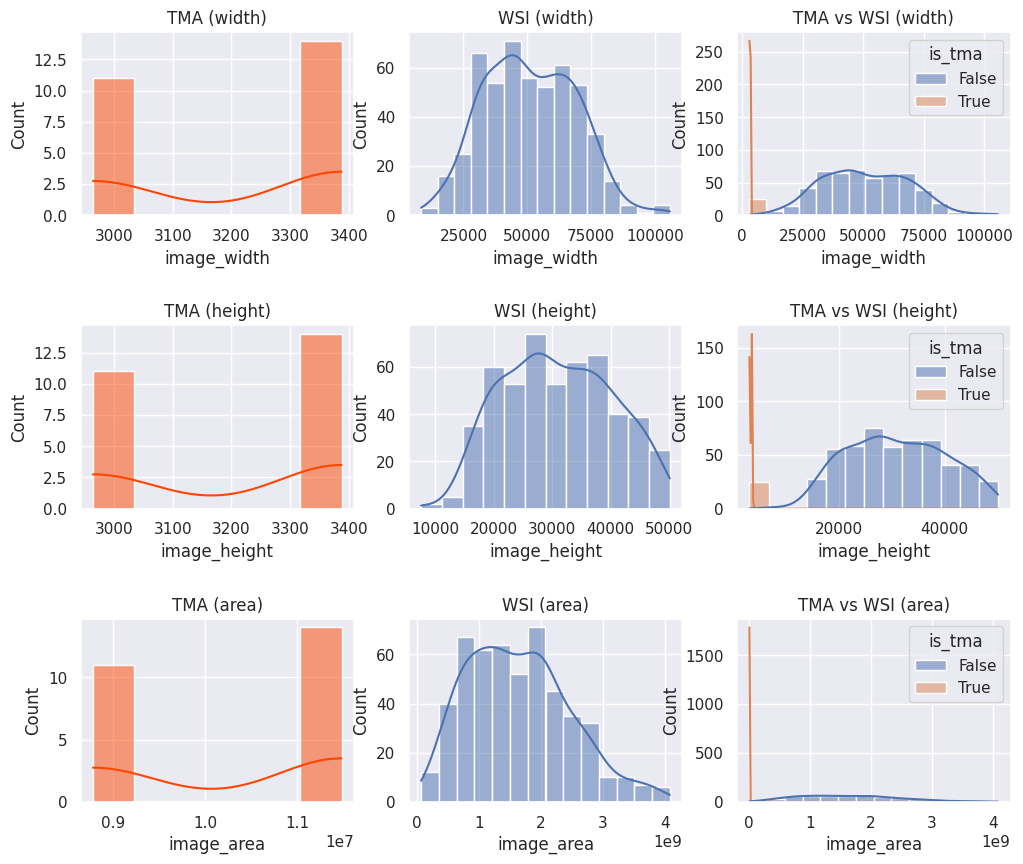

In [22]:
# Histogram of img size (all images)
fig, ax = plt.subplots(3,3, figsize=(12,10))

# Image width
ax[0][0].set_title('TMA (width)')
sns.histplot(ax=ax[0][0], data=train_df[(train_df['is_tma'])==True], x="image_width", kde=True, color='orangered')
ax[0][1].set_title('WSI (width)')
sns.histplot(ax=ax[0][1], data=train_df[(train_df['is_tma'])==False], x="image_width", kde=True)
ax[0][2].set_title('TMA vs WSI (width)')
sns.histplot(ax=ax[0][2], data=train_df, x="image_width", kde=True, hue="is_tma")

# Image height
ax[1][0].set_title('TMA (height)')
sns.histplot(ax=ax[1][0], data=train_df[(train_df['is_tma'])==True], x="image_height", kde=True, color='orangered')
ax[1][1].set_title('WSI (height)')
sns.histplot(ax=ax[1][1], data=train_df[(train_df['is_tma'])==False], x="image_height", kde=True)
ax[1][2].set_title('TMA vs WSI (height)')
sns.histplot(ax=ax[1][2], data=train_df, x="image_height", kde=True, hue="is_tma")

# Image area
ax[2][0].set_title('TMA (area)')
sns.histplot(ax=ax[2][0], data=train_df[(train_df['is_tma'])==True], x="image_area", kde=True, color='orangered')
ax[2][1].set_title('WSI (area)')
sns.histplot(ax=ax[2][1], data=train_df[(train_df['is_tma'])==False], x="image_area", kde=True)
ax[2][2].set_title('TMA vs WSI (area)')
sns.histplot(ax=ax[2][2], data=train_df, x="image_area", kde=True, hue="is_tma")

plt.subplots_adjust(wspace=0.2, hspace=0.6)

In [23]:
import plotly.express as px

df_sizes = train_df[["image_width", "image_height", "label"]]
for col in ("image_width", "image_height"):
    df_sizes = df_sizes.copy()
    df_sizes[col] = [round(i / 1000) * 1000 for i in df_sizes[col]]

df_sizes = df_sizes.groupby(["image_width", "image_height", "label"], as_index=False).size()
# display(df_sizes.head())
fig = px.scatter(
    df_sizes, x="image_width", y="image_height", size="size", color="label",
    height=450, width=900)
fig.update_xaxes(range=[1_000, 120_000])
fig.update_yaxes(scaleanchor="x", scaleratio=1, range=[1_000, 60_000])
fig.show() 